In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
import datetime
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import torch
from torch import nn

def shifting_ace(df, values_for_shift):
    new_df1 = df.iloc[:, 0:9]
    new_columns = {}
    for key, value in values_for_shift.items():
        new_columns[key] = df[key]
        for i in range(1, value+1):
            new_columns[f'{key} -{i}'] = df[key].shift(periods=i, fill_value=np.nan)
    new_df2 = pd.DataFrame(new_columns)
    new_df = pd.concat([new_df1, new_df2], axis=1)
    return new_df

def shifting_discover(df, values_for_shift):
    new_df1 = df.iloc[:, 0:4]
    new_columns = {}
    for key, value in values_for_shift.items():
        new_columns[key] = df[key]
        for i in range(1, value+1):
            new_columns[f'{key} -{i}'] = df[key].shift(periods=i, fill_value=np.nan)
    new_df2 = pd.DataFrame(new_columns)
    new_df = pd.concat([new_df1, new_df2], axis=1)
    return new_df

In [13]:
df = pd.read_csv(r"Compare_ACE_DSCOVR.csv", sep=';', na_values='N', decimal=',')

values = ['Dst', 'B_x', 'B_gsm_y', 'B_gsm_z', 'B_magn', 'H_den_SWP', 'SW_spd']
nums_of_shifts = [43, 26, 12, 3, 19, 16, 56]

# Dst - 43, Bx - 26, B_GSM_y - 12, B_GSM_z - 3, B_magn - 19, SW_spd - 56, H_den - 16

values_for_shift = dict(zip(values, nums_of_shifts))

df = shifting_ace(df, values_for_shift)

print('Как осуществлено погружение:')
check_df = df.iloc[:6, 7:25]
check_df

Как осуществлено погружение:


,doyCos,hourCos,Dst,Dst -1,Dst -2,Dst -3,Dst -4,Dst -5,Dst -6,Dst -7,Dst -8,Dst -9,Dst -10,Dst -11,Dst -12,Dst -13,Dst -14,Dst -15
0,-0.862961,-0.130526,-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.862598,-0.382683,-15,-14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.862235,-0.608761,-15,-15.0,-14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.861872,-0.793353,-13,-15.0,-15.0,-14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.861508,-0.923880,-13,-13.0,-15.0,-15.0,-14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,-0.861143,-0.991445,-14,-13.0,-13.0,-15.0,-15.0,-14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
new_values = list(df.iloc[:, 9:].columns)

date_values = ['year', 'month', 'day', 'hour from']
date = pd.DataFrame(df.loc[:, date_values])

date['hour from'] = date['hour from'].map(lambda x: '0'+str(x) if x not in range(10, 24) else str(x))
date['datetime'] = date['year'].astype(str) + date['month'].astype(str) + date['day'].astype(str) + ' ' + date['hour from']
date['datetime'] = pd.to_datetime(date['datetime'])

dataset = df[new_values]
dataset = dataset.set_index(date['datetime'])

dataset_ACE = dataset #отсюда взять значения дст и соединить с данными с discover
dataset

,Dst,Dst -1,Dst -2,Dst -3,Dst -4,Dst -5,Dst -6,Dst -7,Dst -8,Dst -9,...,SW_spd -47,SW_spd -48,SW_spd -49,SW_spd -50,SW_spd -51,SW_spd -52,SW_spd -53,SW_spd -54,SW_spd -55,SW_spd -56
datetime,,,,,,,,,,,,,,,,,,,,,
1997-10-21 00:00:00,-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-10-21 01:00:00,-15,-14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-10-21 02:00:00,-15,-15.0,-14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-10-21 03:00:00,-13,-15.0,-15.0,-14.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-10-21 04:00:00,-13,-13.0,-15.0,-15.0,-14.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-25 07:00:00,-20,-20.0,-14.0,-15.0,-17.0,-25.0,-21.0,-25.0,-21.0,-11.0,...,499.9834,516.6030,510.9792,515.7847,515.6754,509.1985,518.5083,526.9510,530.7992,534.2426
2021-03-25 08:00:00,-18,-20.0,-20.0,-14.0,-15.0,-17.0,-25.0,-21.0,-25.0,-21.0,...,494.1724,499.9834,516.6030,510.9792,515.7847,515.6754,509.1985,518.5083,526.9510,530.7992
2021-03-25 09:00:00,-11,-18.0,-20.0,-20.0,-14.0,-15.0,-17.0,-25.0,-21.0,-25.0,...,507.8516,494.1724,499.9834,516.6030,510.9792,515.7847,515.6754,509.1985,518.5083,526.9510


In [15]:
names = list(dataset)

scaler = StandardScaler()
dataset = scaler.fit_transform(dataset)
dataset_scaled = pd.DataFrame(dataset, columns=names)
#dataset_scaled = dataset_scaled.set_index(date['datetime'])

dataset_scaled
dataset = dataset_scaled.dropna()

#dataset

In [17]:
data_discover = pd.read_csv(r'Discover_с_интреполяцией12_актуальные_данные_до_22.09.2024.csv', sep=';', decimal=',')

names = ['bx_gsm', 'by_gsm', 'bz_gsm', 'bt', 'proton_density', 'proton_speed', 'proton_temperature']
nums_of_shifts = [43, 21, 11, 3, 14, 10, 55]

# Dst - 43, Bx - 26, B_GSM_y - 12, B_GSM_z - 3, B_magn - 19, SW_spd - 56, H_den - 16

# обрезка данных до даты окончания данных с ACE
## 40715 = 25.03.2021 11:00

data_discover = data_discover.iloc[:40716]
data_discover

,Date time,Date,hour,minute,bt,bx_gse,by_gse,bz_gse,theta_gse,bx_gsm,...,proton_temperature,alpha_vx_gse,alpha_vy_gse,alpha_vz_gse,alpha_vx_gsm,alpha_vy_gsm,alpha_vz_gsm,alpha_speed,alpha_density,alpha_temperature
0,27.07.2016 0:00,27.07.2016,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,27.07.2016 1:00,27.07.2016,1.0,0,2.938196721,1.97442623,0.521639344,0.959672131,20.56163934,1.97442623,...,281664.2459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,27.07.2016 2:00,27.07.2016,2.0,0,3.180819672,2.405081967,-1.239836066,1.384098361,27.02393443,2.405081967,...,273936.9508,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,27.07.2016 3:00,27.07.2016,3.0,0,3.108196721,1.551311475,-2.29442623,-0.308360656,-6.433770492,1.551311475,...,268247.8689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,27.07.2016 4:00,27.07.2016,4.0,0,3.409016393,3.13852459,-1.102295082,0.356557377,6.165245902,3.13852459,...,242968.6393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40711,25.03.2021 7:00,25.03.2021,7.0,0,4.48147541,-3.084590164,-1.300163934,-2.714590164,-37.6252459,-3.084590164,...,91863.03279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40712,25.03.2021 8:00,25.03.2021,8.0,0,5.696721311,-4.850163934,2.257540984,-1.538196721,-16.30311475,-4.850163934,...,60853.98361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40713,25.03.2021 9:00,25.03.2021,9.0,0,4.679344262,-3.42557377,0.339344262,-1.49295082,-22.35721311,-3.42557377,...,69276.09836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40714,25.03.2021 10:00,25.03.2021,10.0,0,4.036065574,-2.720163934,-0.008196721,-0.944754098,-15.2904918,-2.720163934,...,63292.85246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
values_for_shift_discover = dict(zip(names, nums_of_shifts))
data_discover = shifting_discover(data_discover, values_for_shift_discover)

# names = list(data_discover)

# scaler = StandardScaler()
# data_discover = scaler.fit_transform(data_discover)
# data_discover_scaled = pd.DataFrame(data_discover, columns=names)
# #data_discover_scaled = data_discover_scaled.set_index(date['datetime'])

# data_discover_scaled
# data_discover = data_dicover_scaled.dropna()

## Значения дст с 27.07.2016 0:00 по 25.03.2021 11:00
# dst_ACE = dataset_ACE.iloc[164496:, 0:44]
dst_ACE = dataset_ACE.iloc[164496:, 0:1]
dst_ACE

#data_discover = data_discover + dst_ACE
#print(len(data_discover), len(dst_ACE))

,Dst
datetime,
2016-07-27 00:00:00,-7
2016-07-27 01:00:00,-6
2016-07-27 02:00:00,-7
2016-07-27 03:00:00,-6
2016-07-27 04:00:00,-6
...,...
2021-03-25 07:00:00,-20
2021-03-25 08:00:00,-18
2021-03-25 09:00:00,-11


In [16]:
if not dataset.index.is_monotonic_increasing:
   dataset = dataset.sort_index()

x_train = dataset.loc[:'2019-01-01 01:00:00', dataset.columns[1:]].to_numpy()
x_test = dataset.loc['2019-01-01 02:00:00':, dataset.columns[1:]].to_numpy()
y_train = dataset['Dst'].loc[:'2019-01-01 01:00:00'].to_numpy()
y_test = dataset['Dst'].loc['2019-01-01 02:00:00':].to_numpy()

# pipe = make_pipeline(MinMaxScaler(), LinearRegression())
# pipe.fit(x_train, y_train)
# y_pred = pipe.predict(x_test)

model = linear_model.LinearRegression()
model.fit(x_train, y_train)

# print('Coefficients:', model.coef_)
# print('Intercept:', model.intercept_)

y_pred = model.predict(x_test)

R_2 = metrics.r2_score(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
MAE = metrics.mean_absolute_error(y_test, y_pred)

print('R**2 score:', R_2)
print('MSE:', MSE)
print('MAE:', MAE)

R**2 score: 0.918602029619892
MSE: 0.02296801762002206
MAE: 0.10070078241413313


In [8]:
# plt.hist(MSE, color = 'blue', edgecolor = 'black',
#          bins = 5)

# plt.xlabel('ACE')
# plt.ylabel('MSE, нТл')

In [9]:
# corr_matrix = dataset.corr()

# plt.figure(figsize=(6,5))
# sns.heatmap(corr_matrix)
# plt.show()

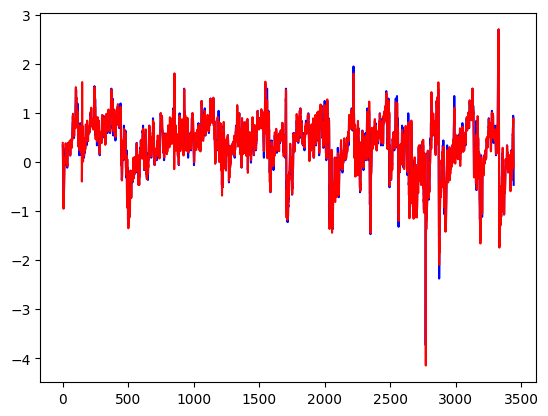

In [10]:
plt.plot(y_test, c='blue')
plt.plot(y_pred, c='red')
plt.show()

In [11]:
import statsmodels.api as sm

#res = sm.tsa.seasonal_decompose(dataset['Dst'])
# plt.rc("figure", figsize=(25,8))
# resplot = res.plot()
res = dataset['Dst']
res

55        0.241598
56        0.492836
57        0.643579
58        0.291846
59        0.492836
            ...   
205339    0.945064
205340    0.894817
205341    0.241598
205342    0.040608
205343   -0.461868
Name: Dst, Length: 202794, dtype: float64